<a href="https://colab.research.google.com/github/timonpalm/TFCourse/blob/main/01_regression_medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OneHotEncoder
import numpy as np
from sklearn.compose import make_column_transformer

In [351]:
# read in the insurance dataset
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [352]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preprocessing

In [353]:
target = insurance.pop('charges')
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [354]:
insurance.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


Text(0, 0.5, 'charges')

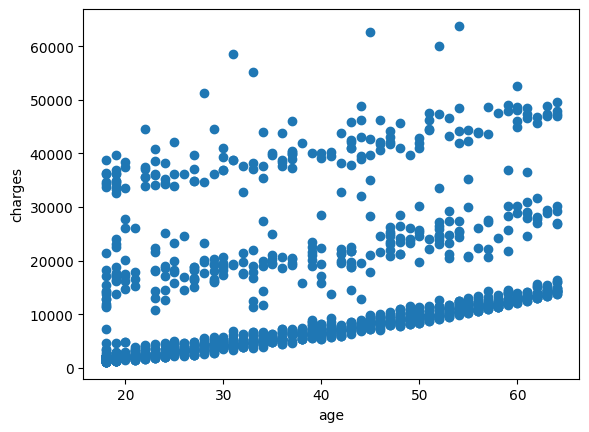

In [355]:
plt.scatter(insurance["age"], target)
plt.xlabel("age")
plt.ylabel("charges")

<Axes: >

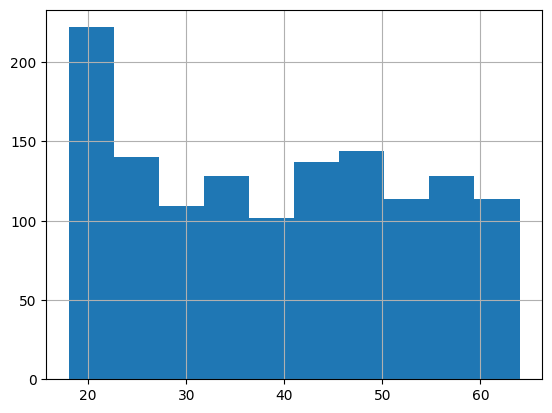

In [356]:
insurance["age"].hist()

<Axes: >

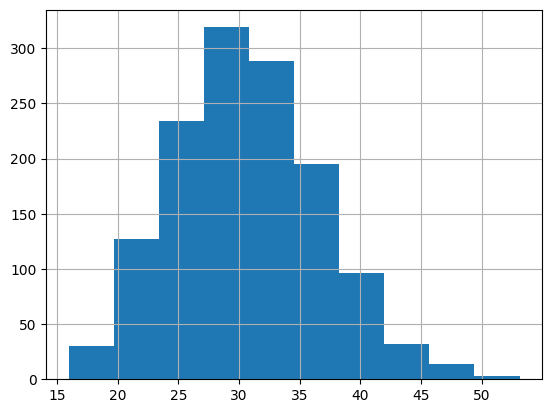

In [357]:
insurance["bmi"].hist()

## OneHot Encoding

### ... With pandas

In [358]:
insurance_e = pd.get_dummies(insurance)
insurance_e

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


### ... with sklearn

In [360]:
# define OneHot encoder
encoder = OneHotEncoder(sparse_output=False)

# define columns that need onehot encoding
columns_to_one_hot = ["sex", "smoker", "region"]

# encode columns
encoded_array = encoder.fit_transform(insurance.loc[:,columns_to_one_hot])
print(encoded_array[:5])

# create dataframe from encoded features, use encoder feature names
df_encoded = pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out())

# add encoded features to dataframe
insurance_encoded = pd.concat([insurance,df_encoded],axis=1)

# remove original features
insurance_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)

insurance_encoded

[[1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0.]]


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Train-Test Split

In [361]:
X_train, X_test, y_train, y_test = train_test_split(
    insurance,
    target,
    test_size=0.33,
    random_state=42,
    shuffle=True
    )

In [362]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    test_size=0.33,
    random_state=42,
    shuffle=True
)

In [363]:
len(X_train), len(X_test), len(X_val), type(X_train)

(896, 296, 146, pandas.core.frame.DataFrame)

## Standadize/ Normalize

In [364]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [365]:
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)
X_val_normal = ct.transform(X_val)

In [369]:
X_train_normal[:5]

array([[0.54347826, 0.24535916, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.45652174, 0.52031208, 0.4       , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.58695652, 0.39104116, 0.2       , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.02173913, 0.45574388, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.91304348, 0.6440678 , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ]])

# Data Preparation

In [370]:
X_train = tf.constant(X_train_normal)
y_train = tf.constant(y_train)

X_test = tf.constant(X_test_normal)
y_test = tf.constant(y_test)

X_val = tf.constant(X_val_normal)
y_val = tf.constant(y_val)

In [371]:
X_train.shape, y_train.shape

(TensorShape([896, 11]), TensorShape([896]))

## Normalization (can also be just added as the first layer)

In [372]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(X_train)
# normalizer(X_train)
# X_train[:5]

## Model

In [381]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(1)
])

In [382]:
callback = tf.keras.callbacks.EarlyStopping(min_delta=10, patience=5)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.MAE,
    metrics=["mse", "mae"]
)

In [383]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[callback]
    )

Epoch 1/100
28/28 [==============================] - 1s 18ms/step - loss: 13358.5342 - mse: 324957408.0000 - mae: 13358.5342 - val_loss: 13414.5488 - val_mse: 334372576.0000 - val_mae: 13414.5488
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 13025.8828 - mse: 315680320.0000 - mae: 13025.8828 - val_loss: 12636.4785 - val_mse: 313642432.0000 - val_mae: 12636.4785
Epoch 3/100
28/28 [==============================] - 0s 8ms/step - loss: 11432.5693 - mse: 276416320.0000 - mae: 11432.5693 - val_loss: 10103.5518 - val_mse: 247590656.0000 - val_mae: 10103.5518
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 8830.9932 - mse: 199903344.0000 - mae: 8830.9932 - val_loss: 8283.5732 - val_mse: 172848896.0000 - val_mae: 8283.5732
Epoch 5/100
28/28 [==============================] - 0s 6ms/step - loss: 7926.5601 - mse: 152640688.0000 - mae: 7926.5601 - val_loss: 8069.7534 - val_mse: 155131936.0000 - val_mae: 8069.7534
Epoch 6/100
28/28 [=============

In [384]:
test_pred = tf.squeeze(model.predict(X_test))

10/10 [==============================] - 0s 2ms/step


In [385]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [386]:
def plot_results(history):
  train_loss = history.history["loss"]
  train_mae = history.history["mae"]
  val_loss = history.history["val_loss"]
  val_mae = history.history["val_mae"]
  num_epochs = len(train_loss)

  plt.figure(figsize=(5,3))
  plt.title("Loss")
  plt.plot(range(num_epochs), train_loss, label="train loss")
  plt.plot(range(num_epochs), val_loss, label="val loss")
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy")
  plt.plot(range(num_epochs), train_mae, label="train mae")
  plt.plot(range(num_epochs), val_mae, label="val mae")
  plt.legend()
  plt.show()

def test_accuracy(preds, targets):
  mse = tf.keras.losses.MAE(targets, preds)
  print(f"MAE: {mse}")

def show_examples(preds, targets, num_examples):
  num_preds = len(preds)
  for i in range(num_examples):
    idx = np.random.choice(range(num_preds))
    print(f"target: {target[idx]}, pred: {preds[idx]}, diff: {np.abs(target[idx] - preds[idx])}")

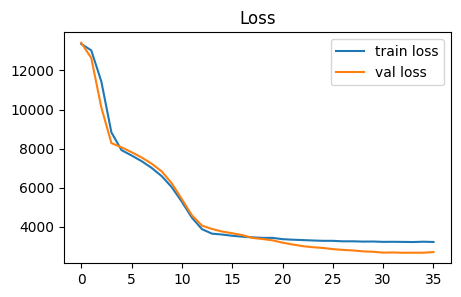

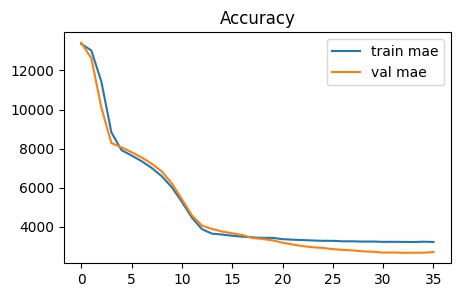

MAE: 3125.930908203125
target: 8538.28845, pred: 10133.013671875, diff: 1594.7255859375
target: 1694.7964, pred: 6391.0390625, diff: 4696.24267578125
target: 11879.10405, pred: 10878.4609375, diff: 1000.6435546875
target: 2404.7338, pred: 11776.2666015625, diff: 9371.533203125
target: 11082.5772, pred: 6542.96630859375, diff: 4539.61083984375


In [387]:
plot_results(history)
test_accuracy(test_pred, y_test)
show_examples(test_pred, y_test, 5)